In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('auto.csv', encoding='utf-8')

In [8]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
100,18.0,6,250.0,88,3021,16.5,73,1,ford maverick
111,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3
341,23.5,6,173.0,110,2725,12.6,81,1,chevrolet citation
79,26.0,4,96.0,69,2189,18.0,72,2,renault 12 (sw)
71,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe
347,37.0,4,85.0,65,1975,19.4,81,3,datsun 210 mpg
238,33.5,4,98.0,83,2075,15.9,77,1,dodge colt m/m
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic
314,26.4,4,140.0,88,2870,18.1,80,1,ford fairmont
232,16.0,8,351.0,149,4335,14.5,77,1,ford thunderbird


In [52]:
df.shape

(397, 10)

# `mpg` mean value

In [25]:
df['mpg'].mean()

23.515869017632248

In [26]:
df['mpg01'] = list(map(lambda x: 1 if x else 0, test['mpg'] > test['mpg'].mean()))

In [35]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


# The number of 0s and 1s

In [28]:
sum(df['mpg01'] == 0)

208

In [29]:
sum(df['mpg01'] == 1)

189

# split the data

In [213]:
df_copy = df.copy()

# some values are missing in 'horsepower', drop these obervations

In [214]:
df_copy = df_copy[df_copy['horsepower'] != '.']

In [215]:
df_copy.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01             int64
dtype: object

In [216]:
df_copy['horsepower'] = df_copy['horsepower'].astype(int)

In [217]:
df_copy.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01             int64
dtype: object

# build the dataset based on formular, `origin` is categorical

In [237]:
from patsy import dmatrices
Y, X = dmatrices('mpg01 ~ cylinders+displacement+horsepower+weight+acceleration+year+C(origin)+0+1', df_copy, return_type = 'dataframe')

In [239]:
X = df_copy[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
Y = df_copy[['mpg01']]

In [240]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [241]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mpg01, dtype: int64

In [242]:
from sklearn.cross_validation import train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4766)

In [336]:
sum(y_train)

130

In [337]:
X_train.shape

(274, 7)

In [338]:
X_test.shape

(118, 7)

In [339]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
216,4,98.0,68,2045,18.5,77,3
261,6,258.0,120,3410,15.1,78,1
151,4,79.0,67,2000,16.0,74,2
212,8,350.0,180,4380,12.1,76,1
280,6,231.0,115,3245,15.4,79,1


In [340]:
df_logit_train = X_train.copy()
df_logit_train['mpg01'] = Y

In [341]:
df_logit_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
216,4,98.0,68,2045,18.5,77,3,1
261,6,258.0,120,3410,15.1,78,1,0
151,4,79.0,67,2000,16.0,74,2,1
212,8,350.0,180,4380,12.1,76,1,0
280,6,231.0,115,3245,15.4,79,1,0


In [342]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
277,6,163.0,133,3410,15.8,78,2
186,4,101.0,83,2202,15.3,76,2
355,4,107.0,75,2210,14.4,81,3
98,6,250.0,100,3278,18.0,73,1
177,4,115.0,95,2694,15.0,75,2


# Logistic regression

In [343]:
logit = sm.Logit.from_formula('mpg01 ~ cylinders + displacement + horsepower + weight +'
                              'acceleration + year + origin', data=df_logit_train)
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.175415
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.746     
Dependent Variable: mpg01            AIC:              112.1273  
Date:               2016-10-06 23:46 BIC:              141.0323  
No. Observations:   274              Log-Likelihood:   -48.064   
Df Model:           7                LL-Null:          -189.56   
Df Residuals:       266              LLR p-value:      2.5702e-57
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept       -24.7818   7.6930 -3.2213 0.0013 -39.8599 -9.7037
cylinders        -0.3206   0.5409 -0.5927 0.5534  -1.3808  0.7396

In [345]:
prediction = [1 if x > 0.5 else 0 for x in result.predict(X_test)]
print(confusion_matrix(y_test, prediction))
print(sum(y_test == prediction) / sum([1 for x in y_test]))

[[58  5]
 [ 8 47]]
0.889830508475


# LDA QDA

In [348]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [392]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA_result = LDA.predict(X_test)

In [393]:
print(confusion_matrix(y_test, LDA_result))
print(sum(y_test == LDA_result) / sum([1 for x in y_test]))

[[51 12]
 [ 2 53]]
0.881355932203


In [380]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
QDA_result = QDA.predict(X_test)

In [381]:
print(confusion_matrix(y_test, QDA_result))
print(sum(y_test == QDA_result) / sum([1 for x in y_test]))

[[52 11]
 [ 4 51]]
0.872881355932


# KNN
# It is better to normalize features. If not, the features with larger values will be dominant.

In [382]:
from sklearn import preprocessing

In [385]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [394]:
from sklearn.neighbors import KNeighborsClassifier

In [417]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_minmax, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [418]:
neigh_result = neigh.predict(X_test_minmax)

In [419]:
print(confusion_matrix(y_test, neigh_result))
print(sum(y_test == neigh_result) / sum([1 for x in y_test]))

[[55  8]
 [ 5 50]]
0.889830508475


In [433]:
KNN_train_result = []
KNN_test_result = []
for i in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_minmax, y_train)
    neigh_result = neigh.predict(X_test_minmax)
    KNN_train_result.append(neigh.score(X_train_minmax, y_train))
    KNN_test_result.append(neigh.score(X_test_minmax, y_test))

In [427]:
%matplotlib inline

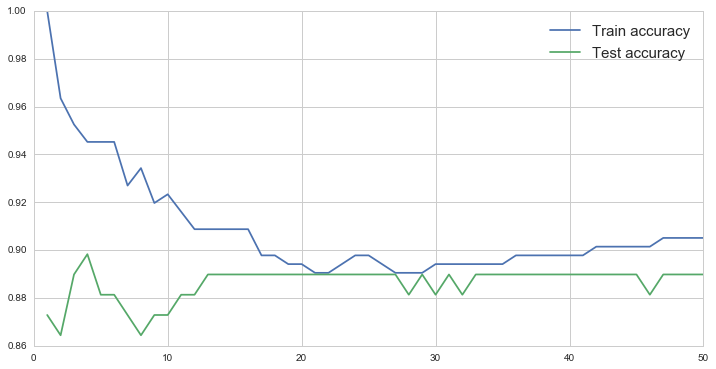

In [453]:
sns.set_style("whitegrid")
sns.despine()
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), KNN_train_result)
plt.plot(range(1, 51), KNN_test_result)
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper right', fontsize = 15)